In [1]:
import pandas as pd
punting = pd.read_csv('punting.csv')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
punting

,Distance,Hang,R_Strength,L_Strength,R_Flexibility,L_Flexibility,O_Strength
0,162.50,4.75,170,170,106,106,240.57
1,144.00,4.07,140,130,92,93,195.49
2,147.50,4.04,180,170,93,78,152.99
3,163.50,4.18,160,160,103,93,197.09
4,192.00,4.35,170,150,104,93,266.56
5,171.75,4.16,150,150,101,87,260.56
6,162.00,4.43,170,180,108,106,219.25
7,104.93,3.20,110,110,86,92,132.68
8,105.67,3.02,120,110,90,86,130.24
9,117.59,3.64,130,120,85,80,205.88


In [4]:
punting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
Distance         13 non-null float64
Hang             13 non-null float64
R_Strength       13 non-null int64
L_Strength       13 non-null int64
R_Flexibility    13 non-null int64
L_Flexibility    13 non-null int64
O_Strength       13 non-null float64
dtypes: float64(3), int64(4)
memory usage: 808.0 bytes


#### Data set has  13 samples and 7 variables. No categorical variables 

Variable		Description
Distance		Distance travelled in feet
Hang		    Time in air in seconds
R_Strength		Right leg strength in pounds
L_Strength		Left leg strength in pounds
R_Flexibility	Right leg flexibility in degrees
L_Flexibility	Left leg flexibility in degrees
O_Strength		Overall leg strength in pounds


#### Statistical Information

In [5]:
punting.describe()

,Distance,Hang,R_Strength,L_Strength,R_Flexibility,L_Flexibility,O_Strength
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,148.233077,3.920769,147.692308,143.846154,95.692308,91.230769,196.187692
std,25.970028,0.488850,22.786636,22.926863,7.792995,8.574709,47.805056
min,104.930000,3.020000,110.000000,110.000000,85.000000,78.000000,130.240000
25%,140.250000,3.640000,130.000000,130.000000,90.000000,86.000000,153.920000
50%,150.170000,4.040000,150.000000,150.000000,93.000000,93.000000,197.090000
75%,163.500000,4.180000,170.000000,160.000000,103.000000,94.000000,240.570000
max,192.000000,4.750000,180.000000,180.000000,108.000000,106.000000,266.560000


#### From the count we can interpret there are no missing variables


#### To get the column names

In [6]:
punting.columns

Index(['Distance', 'Hang', 'R_Strength', 'L_Strength', 'R_Flexibility',
       'L_Flexibility', 'O_Strength'],
      dtype='object')

### Choosing the target variable

#### Distance is the target variable and the predictor variables are 'Hang', 'R_Strength', 'L_Strength', 'R_Flexibility',  'L_Flexibility', 'O_Strength'

In [7]:
punting.corr()

,Distance,Hang,R_Strength,L_Strength,R_Flexibility,L_Flexibility,O_Strength
Distance,1.000000,0.818854,0.791467,0.744030,0.806334,0.407743,0.796187
Hang,0.818854,1.000000,0.832066,0.862209,0.845080,0.532747,0.755800
R_Strength,0.791467,0.832066,1.000000,0.895722,0.774677,0.356948,0.606545
L_Strength,0.744030,0.862209,0.895722,1.000000,0.814068,0.423239,0.523076
R_Flexibility,0.806334,0.845080,0.774677,0.814068,1.000000,0.689540,0.690284
L_Flexibility,0.407743,0.532747,0.356948,0.423239,0.689540,1.000000,0.408123
O_Strength,0.796187,0.755800,0.606545,0.523076,0.690284,0.408123,1.000000


In [8]:
import seaborn as sns
%matplotlib inline

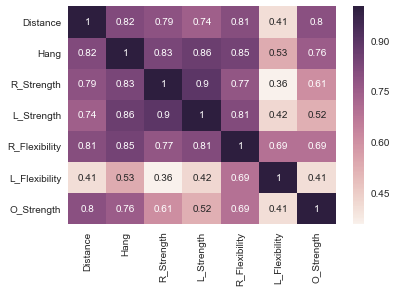

In [9]:
sns.heatmap(punting.corr(), annot =True)

In [10]:
#sns.pairplot(punting)

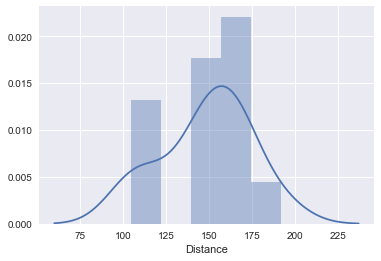

In [11]:
sns.distplot(punting['Distance'])

In [12]:
x = punting[['Hang', 'R_Strength', 'L_Strength', 'R_Flexibility',
       'L_Flexibility', 'O_Strength']]

In [13]:
#x

In [14]:
y = punting['Distance']

#### Splitting the dataset into Train and Test set(80:20)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=10)

In [17]:
#y_test

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### y-intercept


In [20]:
lm.intercept_

-21.911923864987472

#### coefficients

In [21]:
lm.coef_

array([ 2.79237551,  0.06289208,  0.25829689,  1.29299176, -0.78460801,
        0.29414243])

In [22]:
pd.DataFrame(lm.coef_,x.columns, columns=['coeff'])

,coeff
Hang,2.792376
R_Strength,0.062892
L_Strength,0.258297
R_Flexibility,1.292992
L_Flexibility,-0.784608
O_Strength,0.294142


#### predicting the y values for the test dataset(x_test)

In [23]:
predictions = lm.predict(x_test)

In [24]:
predictions

array([ 159.33257762,  100.39463555,  121.21238812])

#### plot showing the actual value and predicted value


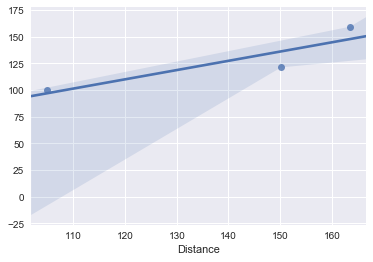

In [25]:
sns.regplot(y_test, predictions)

In [26]:
#sns.distplot((y_test-predictions))

In [27]:
#lm.score(x,y)

In [28]:
from sklearn import metrics

#### mean absolute error



In [29]:
metrics.mean_absolute_error(y_test,predictions)

12.553466235849493

#### mean squared error


In [30]:
metrics.mean_squared_error(y_test,predictions)

292.16007522202602

#### root mean squared error


In [31]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,predictions))

17.092690695792339

#### R-squared value


In [32]:
print('R^2 =',metrics.explained_variance_score(y_test,predictions))

R^2 = 0.78582144583


#### Testing with actual data [5,180,185,110,110,267]

In [33]:
test_data = [5,180,185,110,110,267]
#test_data = [3.2,110,110,86,92,132.68]
import numpy as np
test_data = np.array(test_data).reshape(1,-1)
test_data

array([[  5, 180, 185, 110, 110, 267]])

In [34]:
prediction = lm.predict(test_data)

#### predicted distance


In [35]:
prediction

array([ 185.61369268])